In [1]:
import pandas as pd

In [36]:
tiktok_copy = pd.read_csv("TikTok profiles dataset (Public web data).csv")

In [33]:
# Filter the TikTok profiles with more than 1 million followers
tiktok_copy[tiktok_copy['followers'] > 1000000] # Filtered data

tiktok_copy[tiktok_copy['followers'] > 1000000].shape

(20, 18)

In [37]:
tiktok_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1000 non-null   object 
 1   account_id               1000 non-null   object 
 2   nickname                 1000 non-null   object 
 3   biography                997 non-null    object 
 4   awg_engagement_rate      1000 non-null   float64
 5   comment_engagement_rate  1000 non-null   float64
 6   like_engagement_rate     1000 non-null   float64
 7   bio_link                 191 non-null    object 
 8   is_verified              1000 non-null   bool   
 9   followers                1000 non-null   int64  
 10  following                1000 non-null   int64  
 11  likes                    1000 non-null   int64  
 12  videos_count             1000 non-null   int64  
 13  create_time              0 non-null      float64
 14  id                       

In [34]:
tiktok = pd.read_csv("TikTok profiles dataset (Public web data).csv")
tiktok["total_awg_engagement"] = tiktok["awg_engagement_rate"] * tiktok["followers"]
tiktok["total_engagement_rate"] = tiktok["comment_engagement_rate"] + tiktok["like_engagement_rate"] * tiktok["followers"]
tiktok["has_bio_link"] = ~tiktok['bio_link'].isna()
tiktok["likes_per_video"] = tiktok["likes"] / tiktok["videos_count"]
tiktok["likes_per_follower"] = tiktok["likes"] / tiktok["followers"]
tiktok["top_vids_count"] = [string.count('https://www.tiktok.com/') for string in tiktok["top_videos"]]
tiktok["undefiend_url"] = ["/@undefined"[-len("/@undefined"):] == "/@undefined" in string for string in tiktok["url"]]

tiktok.head()

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,...,top_videos,url,profile_pic_url,total_awg_engagement,total_engagement_rate,has_bio_link,likes_per_video,likes_per_follower,top_vids_count,undefiend_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,...,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...,87.100000,79.254473,False,79.300000,0.903704,20,False
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,...,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,21.000000,19.461501,False,17.080000,10.855932,35,False
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,...,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...,2.742857,2.628630,False,105.263158,12.244898,35,False
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,...,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,20.200000,20.004651,False,20.000000,2.325581,5,False
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,...,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,33.750000,31.508152,False,31.500000,0.456522,4,False


In [3]:
# List of columns to drop
columns_to_drop = ['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate', 'profile_pic_url',
                   'bio_link', 'create_time', 'top_videos', 'url', 'id', 'biography', 'account_id', 'nickname']

# Drop the columns
tiktok.drop(columns=columns_to_drop, inplace=True)

In [4]:
tiktok

,timestamp,is_verified,followers,following,likes,videos_count,total_awg_engagement,total_engagement_rate,has_bio_link,likes_per_video,likes_per_follower,top_vids_count,undefiend_url
0,2023-08-01,False,1755,1443,1586,20,87.100000,79.254473,False,79.300000,0.903704,20,False
1,2023-08-01,False,354,1422,3843,225,21.000000,19.461501,False,17.080000,10.855932,35,False
2,2023-07-30,False,1960,243,24000,228,2.742857,2.628630,False,105.263158,12.244898,35,False
3,2023-08-06,False,43,41,100,5,20.200000,20.004651,False,20.000000,2.325581,5,False
4,2023-07-25,False,276,2262,126,4,33.750000,31.508152,False,31.500000,0.456522,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-07-30,False,956,294,4028,110,73.029412,68.651643,False,36.618182,4.213389,34,False
996,2023-07-30,False,55,226,101,4,25.500000,25.254545,False,25.250000,1.836364,4,False
997,2023-08-12,False,12100,256,102400,89,873.428571,861.315287,True,1150.561798,8.462810,35,True
998,2023-08-05,False,2763,8059,18300,216,203.529412,193.709438,False,84.722222,6.623236,34,False


**DBSCAN**

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features_for_clustering = [ "top_vids_count", 
    "total_engagement_rate", 'followers', 'following'  
]

# Preprocess the data (scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tiktok[features_for_clustering])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
tiktok["cluster"] = dbscan.fit_predict(scaled_data)

# Analyze the clusters and assign labels
cluster_labels = {
    -1: "Noise",
    0: "Cluster 1",
    1: "Cluster 2",
    # Add more labels as needed
}
tiktok["engagement_category"] = tiktok["cluster"].map(cluster_labels)


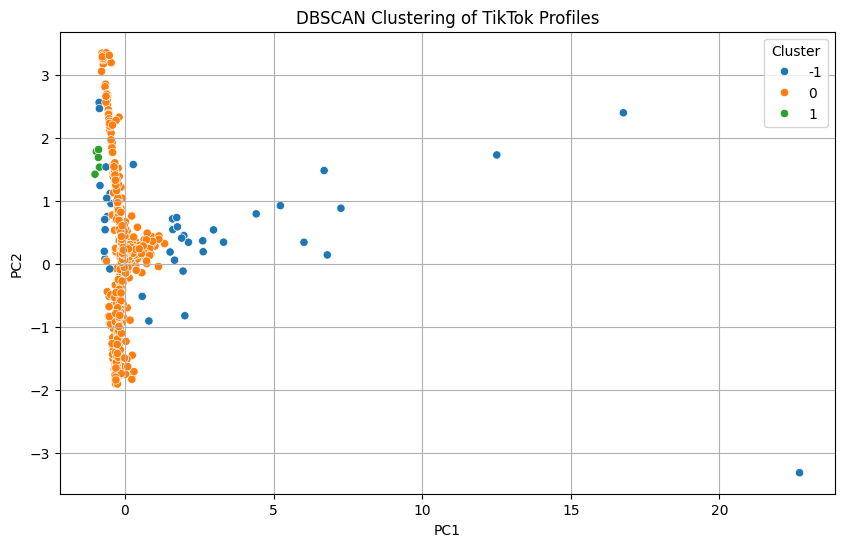

In [9]:
# Visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce the dimensionality of the data for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["cluster"] = tiktok["cluster"]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_df, palette="tab10")
plt.title("DBSCAN Clustering of TikTok Profiles")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


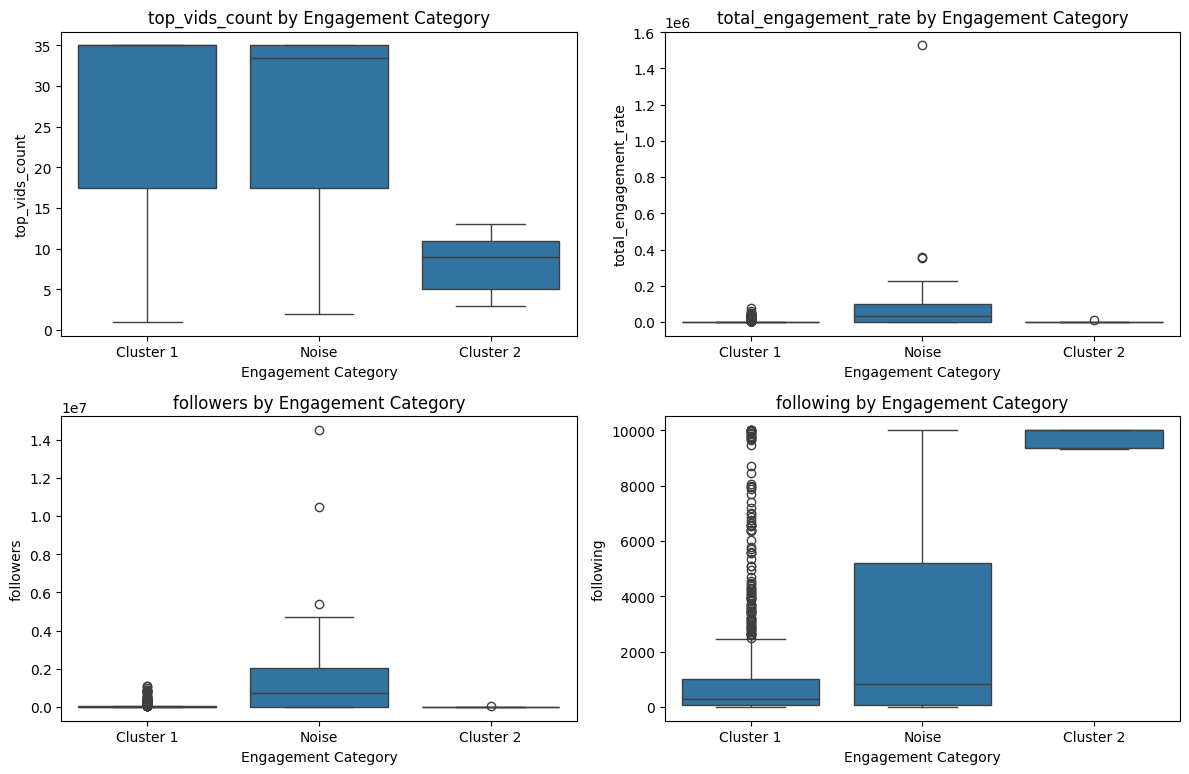

In [10]:
# Visualize the features of each cluster
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="engagement_category", y=feature, data=tiktok)
    plt.title(f"{feature} by Engagement Category")
    plt.xlabel("Engagement Category")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


DBSCAN is a density-based clustering algorithm that groups together points that are closely packed based on a distance measurement (eps) and a minimum number of points (min_samples) required to form a cluster. It is particularly useful for identifying noise and outliers in the data.<br>
**It did not work well in this case because the data may not have clear clusters or the parameters (eps and min_samples) were not properly tuned. We can explore other clustering algorithms like K-means or hierarchical clustering for better results.**

**K-means**

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features_for_clustering = [ "top_vids_count", 
    "total_engagement_rate", 'followers', 'following'  
]
# Preprocess the data (scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tiktok[features_for_clustering])

# Choose the number of clusters (K)
k = 3  

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
tiktok["cluster"] = kmeans.fit_predict(scaled_data)

# Analyze the clusters and assign labels
cluster_labels = {
    0: "Medium Engagement",
    1: "Low Engagement",
    2: "High Engagement"
}
tiktok["engagement_category"] = tiktok["cluster"].map(cluster_labels)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


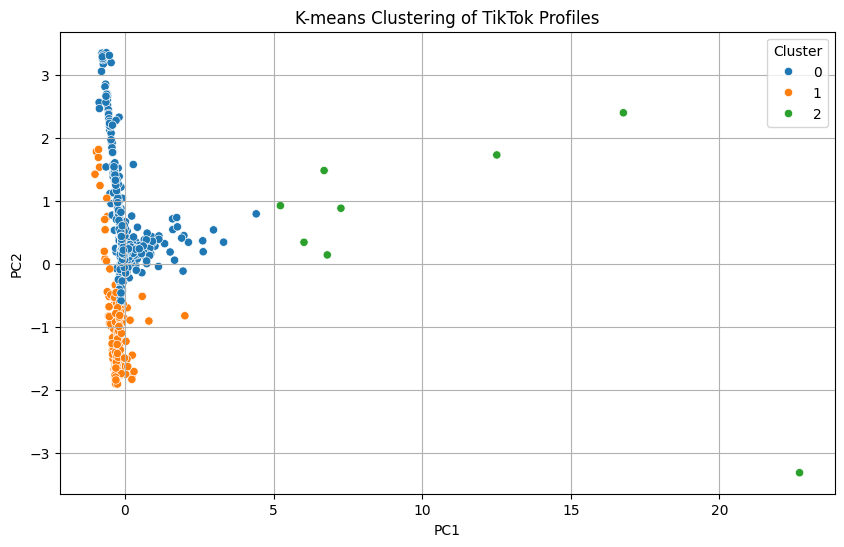

In [18]:
# Visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce the dimensionality of the data for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["cluster"] = tiktok["cluster"]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_df, palette="tab10")
plt.title("K-means Clustering of TikTok Profiles")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


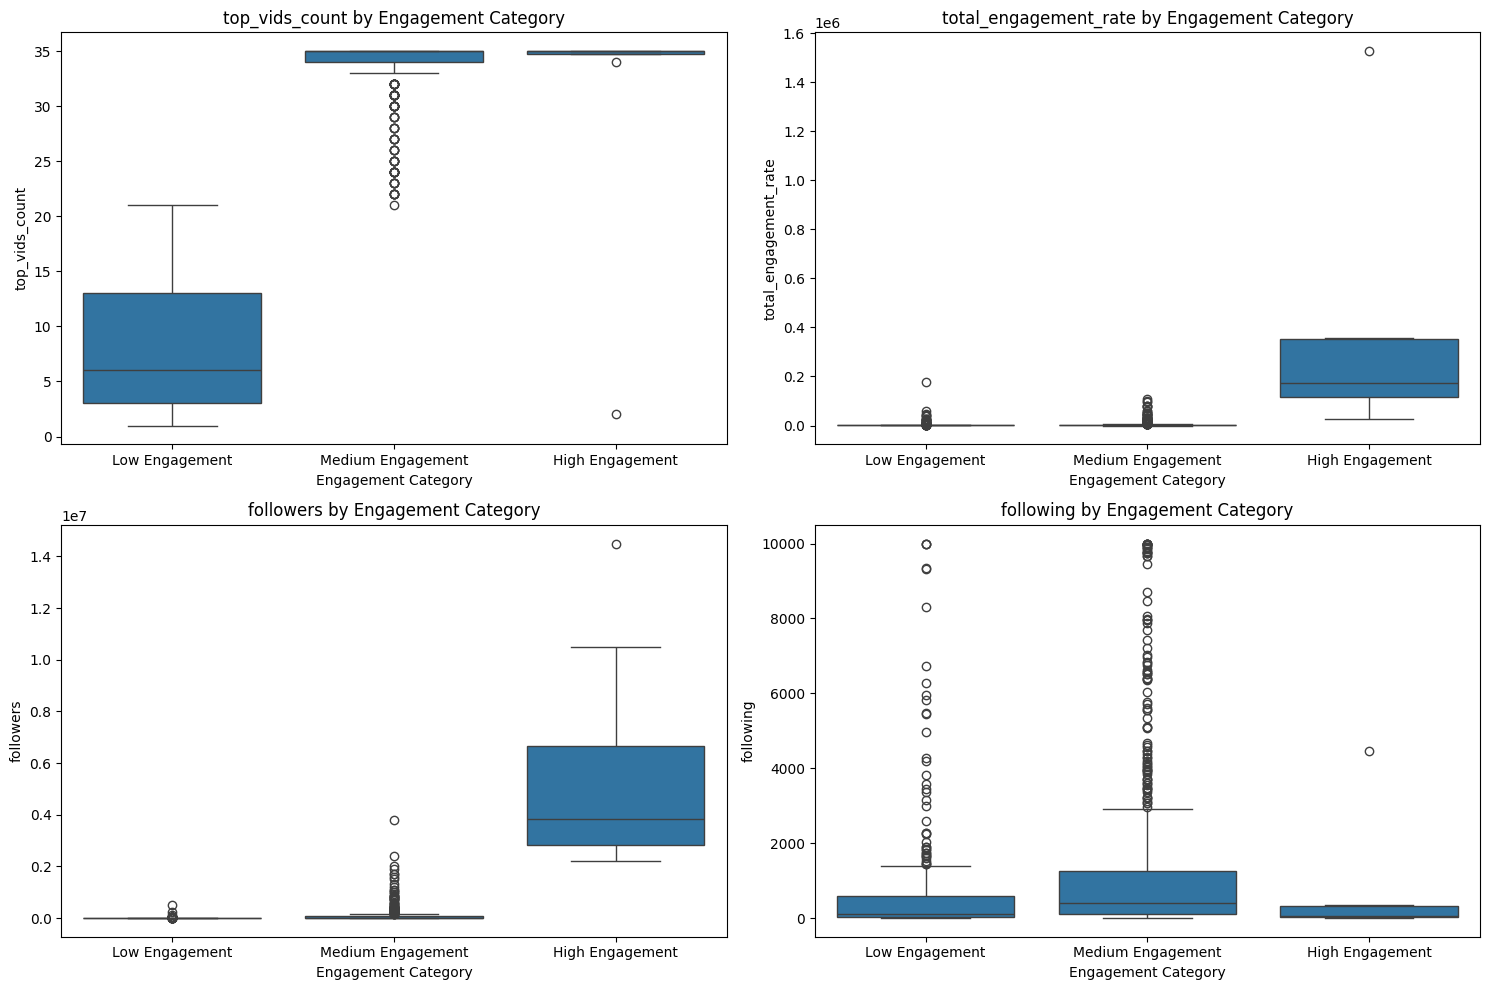

In [19]:
# Visualize the features of each cluster
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="engagement_category", y=feature, data=tiktok)
    plt.title(f"{feature} by Engagement Category")
    plt.xlabel("Engagement Category")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [21]:
# Value count of each cluster
tiktok["engagement_category"].value_counts()


engagement_category
Medium Engagement    706
Low Engagement       286
High Engagement        8
Name: count, dtype: int64

K-means clustering is a type of unsupervised learning algorithm that groups similar data points into a predefined number of clusters. The algorithm aims to minimize the variance within each cluster and maximize the variance between clusters. In this case, we applied K-means clustering to the TikTok profiles dataset to group profiles based on their engagement metrics (e.g., total engagement rate, followers, following, etc.).<br>
It somewhat makes sense to use K-means clustering for this dataset because we want to identify distinct groups of profiles with similar engagement characteristics. By clustering the profiles, we can gain insights into the different engagement categories and potentially identify patterns or trends among the profiles.<br>
The number of clusters (K) was chosen based on the characteristics of the engagement metrics and the desired level of granularity in the clustering. In this case, we chose K=3 to represent low, medium, and high engagement categories. The clusters were visualized using a scatter plot of the reduced data (PCA) and box plots of the engagement features for each cluster.<br>
It explained the clusters to some extent, but further analysis and interpretation may be needed to fully understand the characteristics of each cluster and derive actionable insights from the clustering results. Additional data exploration, feature engineering, or domain knowledge may help refine the clustering and provide more meaningful insights into the TikTok profiles.<br>
We will still explore for other clustering algorithms to see if we can get better results.

**Hierarichal clustering**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


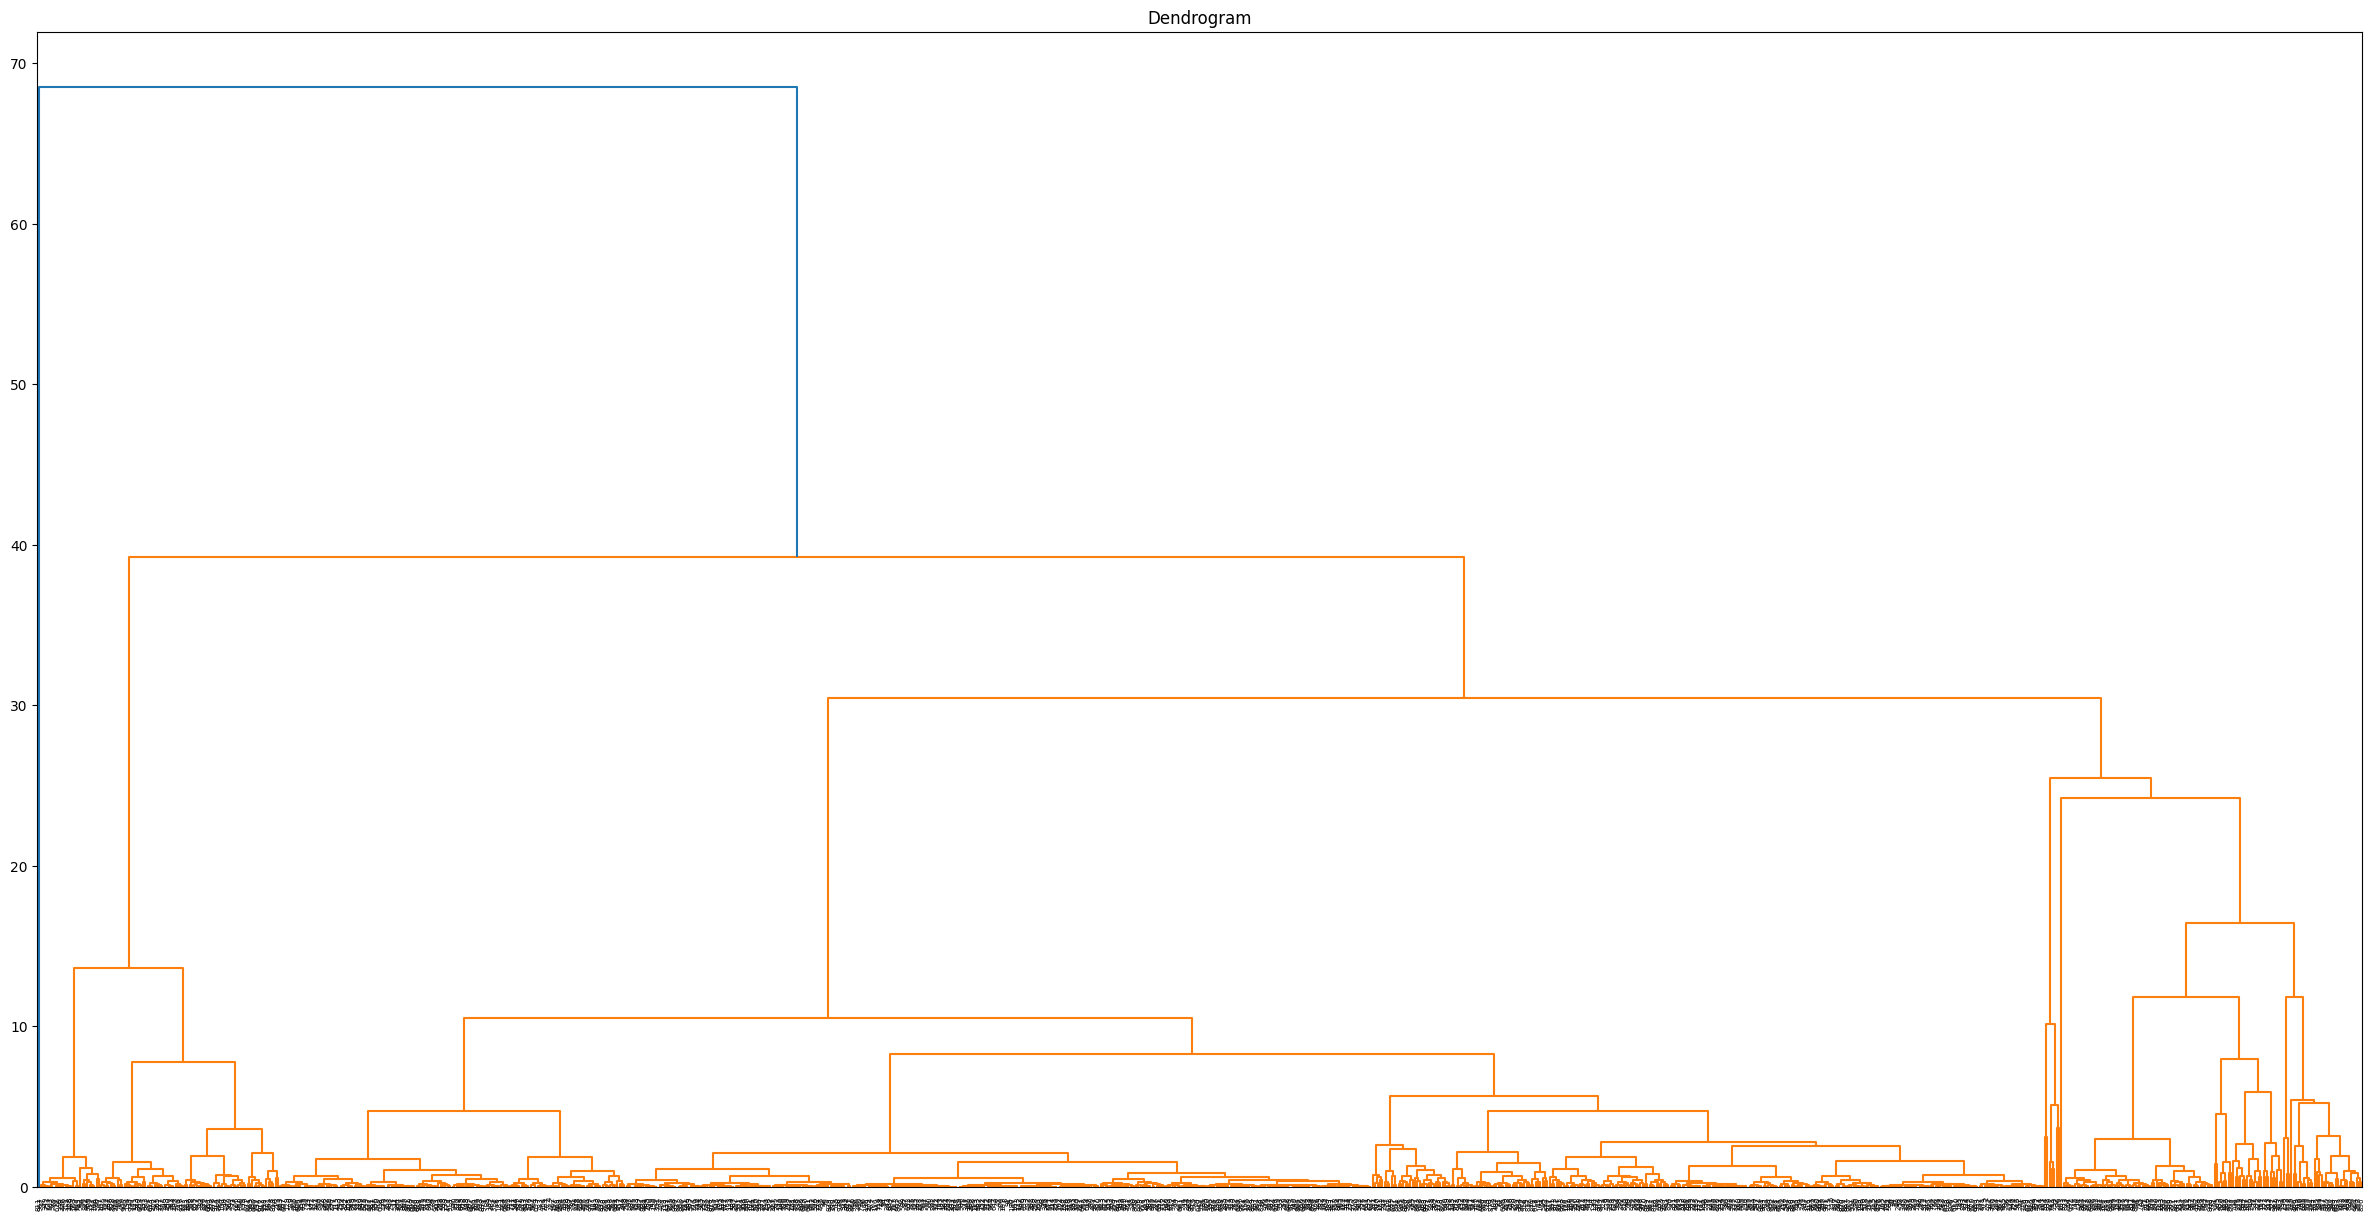

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Select relevant features for clustering
features_for_clustering = [ "likes_per_video", 'likes_per_follower',
    "total_engagement_rate",  'following' , 'total_awg_engagement'
]

# Preprocess the data (scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tiktok[features_for_clustering])

# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
tiktok["cluster"] = clustering.fit_predict(scaled_data)

# Visualize the dendrogram to help determine the number of clusters
plt.figure(figsize=(30, 15))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))
plt.show()

# Analyze the clusters and assign labels
cluster_labels = {
    0: "Medium Engagement",
    1: "High Engagement",
    2: "Low Engagement"
}
tiktok["engagement_category"] = tiktok["cluster"].map(cluster_labels)


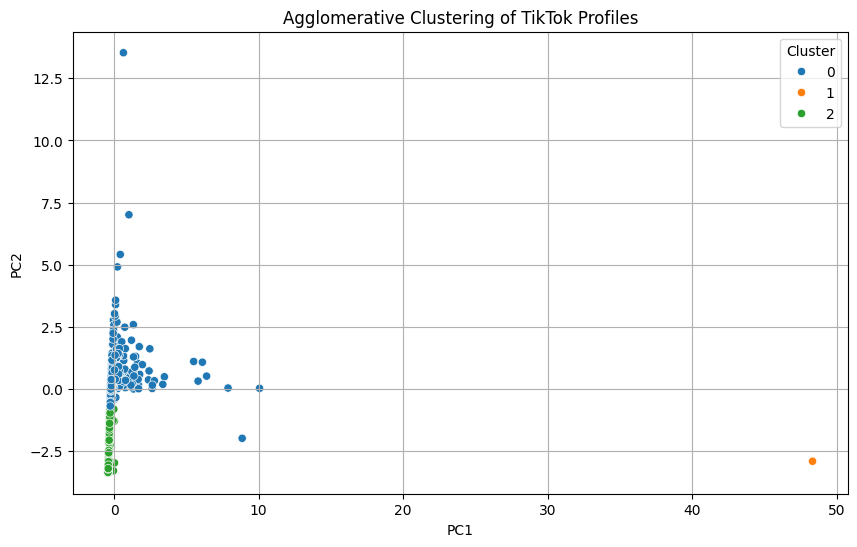

In [26]:
# Visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce the dimensionality of the data for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["cluster"] = tiktok["cluster"]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_df, palette="tab10")
plt.title("Agglomerative Clustering of TikTok Profiles")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()



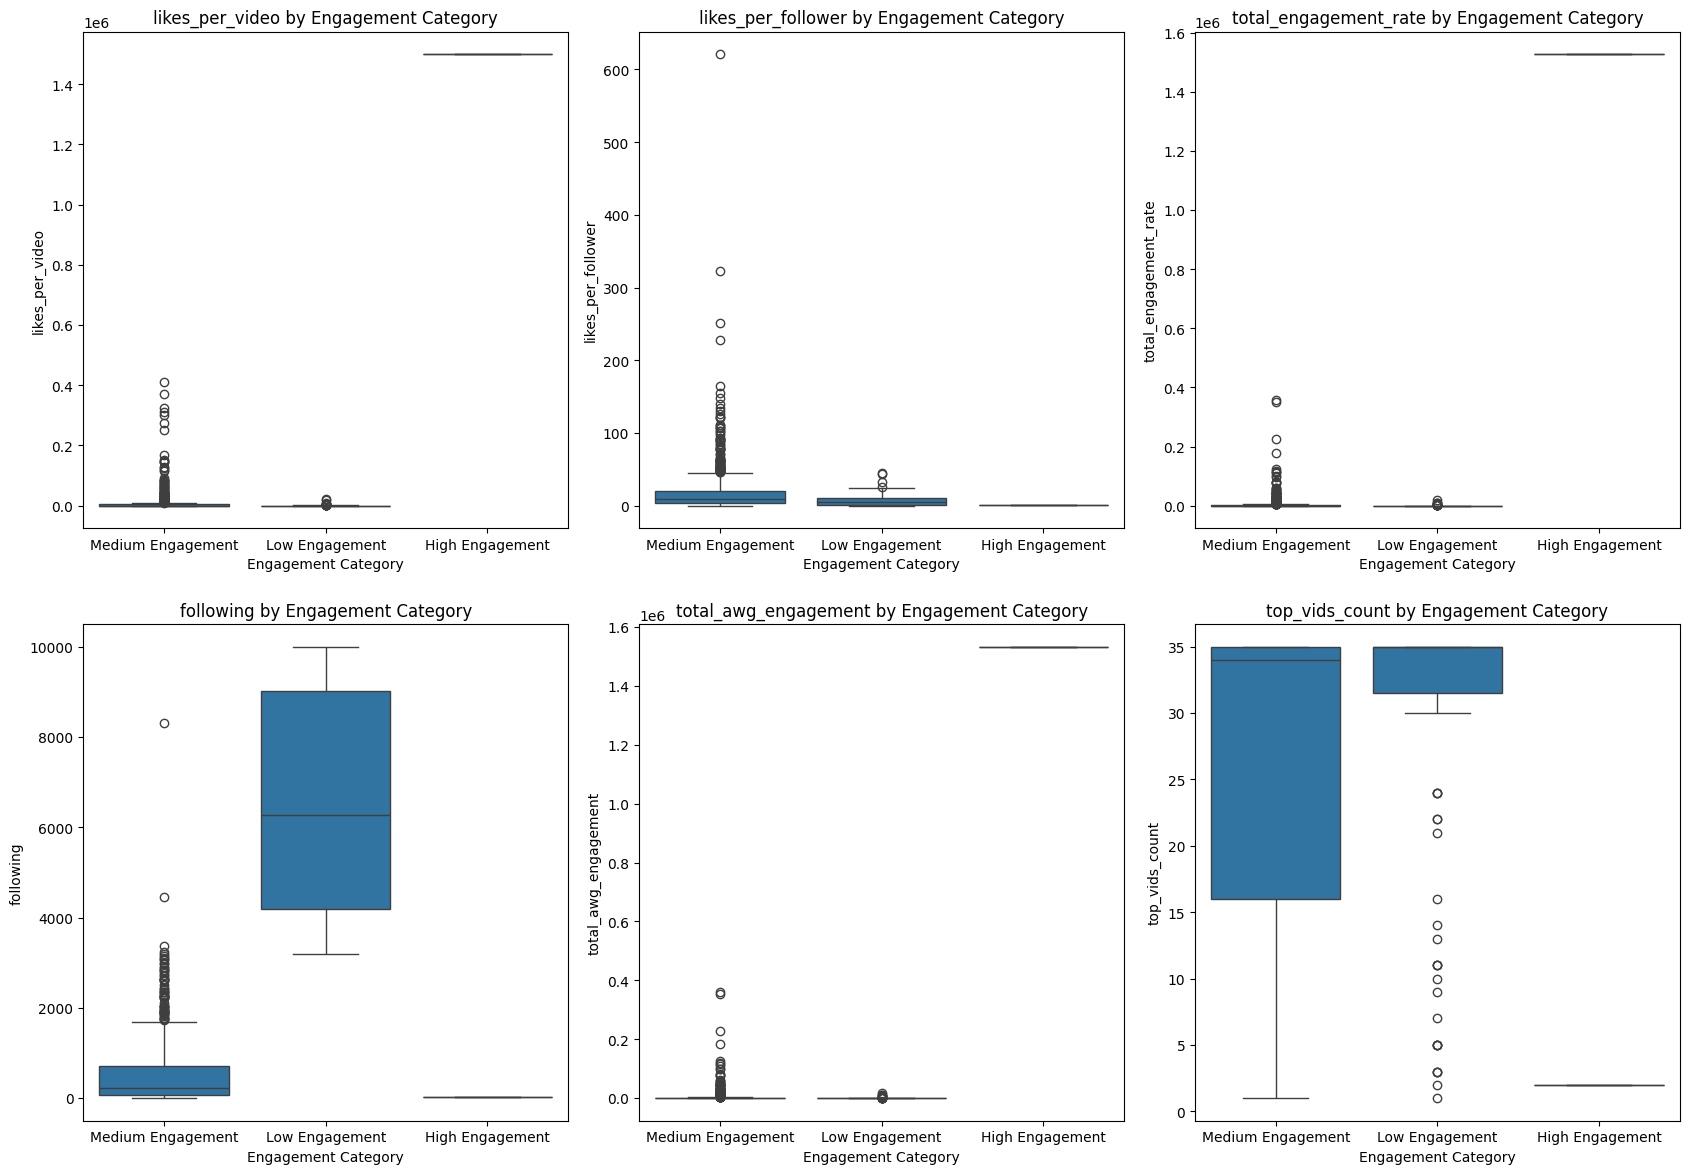

In [173]:
# Visualize the features of each cluster
plt.figure(figsize=(17, 12))
for i, feature in enumerate(features_for_clustering + ['top_vids_count']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x="engagement_category", y=feature, data=tiktok)
    plt.title(f"{feature} by Engagement Category")
    plt.xlabel("Engagement Category")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

**Heirarchical clustering is a type of clustering that groups similar objects into clusters based on a hierarchical structure. It starts with each object as a separate cluster and then merges the clusters based on their similarity. This process continues until all objects are in a single cluster or until a stopping criterion is met.**<br>
In this case, we used the AgglomerativeClustering algorithm, which is a bottom-up approach where each object starts in its cluster and is then merged with the closest cluster based on a linkage criterion (e.g., ward, average, complete). The number of clusters is determined by the dendrogram, which shows the hierarchical structure of the clusters.<br>
The dendrogram helps visualize the merging process and can be used to determine the optimal number of clusters based on the distance at which clusters are merged. In this case, we chose 3 clusters based on the dendrogram.<br>
The clusters were then analyzed, and labels were assigned based on the characteristics of each cluster. The clusters were visualized using PCA to reduce the dimensionality of the data and plot the clusters in a 2D space.<br>
The features of each cluster were also visualized using box plots to compare the distribution of features across different engagement categories. This helps understand the characteristics of each cluster and how they differ in terms of engagement metrics.<br>
Overall, hierarchical clustering is a useful technique for grouping similar objects into clusters based on a hierarchical structure and can provide insights into the underlying patterns in the data.
    
Conclusion:
In this project, we explored different clustering techniques to group TikTok profiles based on their engagement metrics. We used DBSCAN, K-means, and hierarchical clustering to cluster the profiles into different categories based on their engagement rates, followers, and other features.<br>
and for this dataset the Heirarchical clustering is the best clustering technique to use because it explains the data in a better way and the clusters from it makes more sense than the other clustering techniques.

In [142]:
# Save the clustered data to a new CSV file
tiktok.to_csv("tiktok_clustered.csv", index=False)


In [143]:
tiktok

,timestamp,is_verified,followers,following,likes,videos_count,total_awg_engagement,total_engagement_rate,has_bio_link,likes_per_video,likes_per_follower,top_vids_count,undefiend_url,cluster,engagement_category
0,2023-08-01,False,1755,1443,1586,20,87.100000,79.254473,False,79.300000,0.903704,20,False,1,High Engagement
1,2023-08-01,False,354,1422,3843,225,21.000000,19.461501,False,17.080000,10.855932,35,False,0,Medium Engagement
2,2023-07-30,False,1960,243,24000,228,2.742857,2.628630,False,105.263158,12.244898,35,False,0,Medium Engagement
3,2023-08-06,False,43,41,100,5,20.200000,20.004651,False,20.000000,2.325581,5,False,1,High Engagement
4,2023-07-25,False,276,2262,126,4,33.750000,31.508152,False,31.500000,0.456522,4,False,1,High Engagement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-07-30,False,956,294,4028,110,73.029412,68.651643,False,36.618182,4.213389,34,False,0,Medium Engagement
996,2023-07-30,False,55,226,101,4,25.500000,25.254545,False,25.250000,1.836364,4,False,1,High Engagement
997,2023-08-12,False,12100,256,102400,89,873.428571,861.315287,True,1150.561798,8.462810,35,True,0,Medium Engagement
998,2023-08-05,False,2763,8059,18300,216,203.529412,193.709438,False,84.722222,6.623236,34,False,0,Medium Engagement


In [174]:
# Getting instance of high engagement users
high_engagement = tiktok[tiktok['engagement_category'] == 'High Engagement']
high_engagement

,timestamp,is_verified,followers,following,likes,videos_count,total_awg_engagement,total_engagement_rate,has_bio_link,likes_per_video,likes_per_follower,top_vids_count,undefiend_url,cluster,engagement_category
811,2023-08-11,True,3000000,15,3000000,2,1533805.5,1.527650e+06,False,1500000.0,1.0,2,True,1,High Engagement
